In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Using TensorFlow backend.


In [9]:
#read the dataset
#use na_values to mark the missing values and index_col = 0 to remove the index in dataset
#python gives one index by default

ds = pd.read_csv("H:/Some CSV datasets/blood.csv", na_values=".", index_col=0)
ds.head()

,SrNo,Gender,BloodGroup,Age,WBC,RBC,Chol
1,1,Female,AB,Young,7710.0,7.40,258.0
2,2,Male,AB,Old,6560.0,4.70,NaN
3,3,Male,A,Young,5690.0,7.53,184.0
4,4,Male,B,Old,6680.0,6.85,NaN
5,5,Male,A,Young,NaN,7.72,187.0


In [10]:
#find the shape of the dataset
ds.shape

(1000, 7)

In [11]:
#find the sum of total number of missing values in each column
pd.isnull(ds).sum()

SrNo            0
Gender          0
BloodGroup      0
Age             0
WBC            92
RBC            84
Chol          205
dtype: int64

# Technique 1

In [12]:
#print the column with only missing values
data = ds.iloc[:,4:]
data.head()

,WBC,RBC,Chol
1,7710.0,7.40,258.0
2,6560.0,4.70,NaN
3,5690.0,7.53,184.0
4,6680.0,6.85,NaN
5,NaN,7.72,187.0


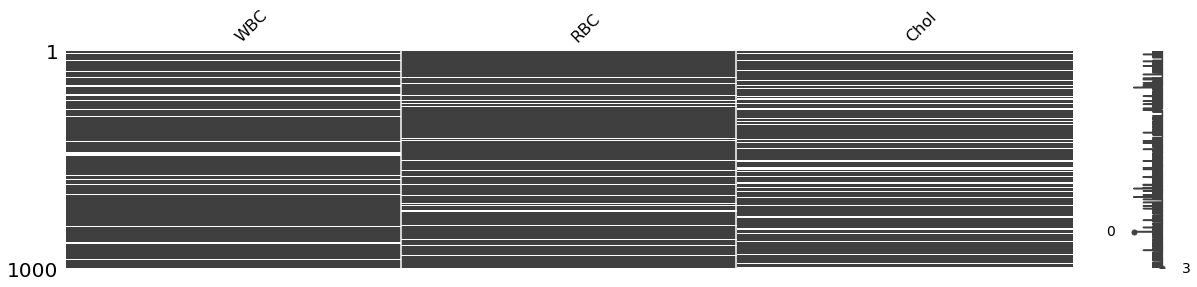

In [13]:
#make a matrix of the missing value column
mn.matrix(data, figsize=(20,4))

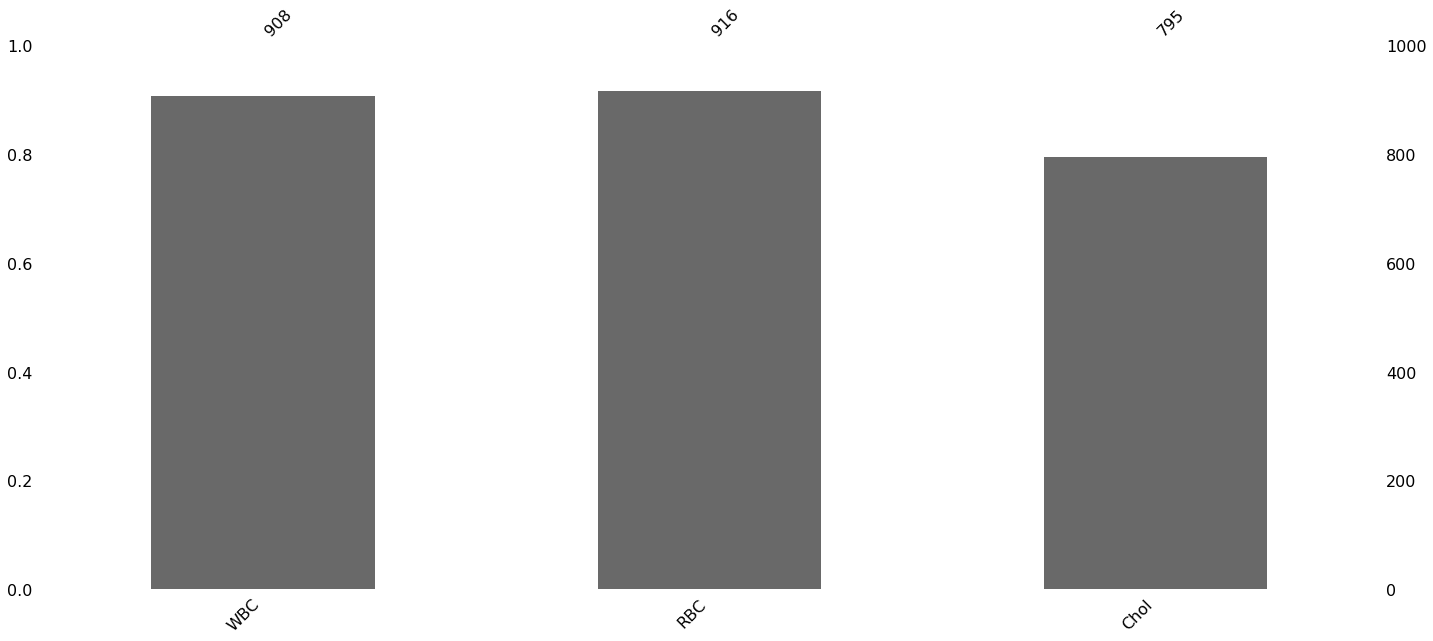

In [14]:
#making bar graph
mn.bar(data)

In [15]:
#MICE Formula
YYY = fancyimpute.MICE(verbose=False)

In [17]:
#create new data Data1 and complete the missing value
Data1 = YYY.complete(data)

#Find the shape of new created Data1
Data1.shape

In [18]:
#convert the shape into matrix form and print the head
df = pd.DataFrame(Data1)
df.head()

,0,1,2
0,7710.000000,7.40,258.000000
1,6560.000000,4.70,203.248039
2,5690.000000,7.53,184.000000
3,6680.000000,6.85,200.484295
4,7022.516382,7.72,187.000000


In [21]:
print(pd.isnull(df).sum())

0    0
1    0
2    0
dtype: int64


In [35]:
#print the total data
df = pd.DataFrame(Data1)
print(df)

               0         1           2
0    7710.000000  7.400000  258.000000
1    6560.000000  4.700000  198.670898
2    5690.000000  7.530000  184.000000
3    6680.000000  6.850000  208.456480
4    7066.901578  7.720000  187.000000
5    6140.000000  3.690000  142.000000
6    6550.000000  4.780000  290.000000
7    5200.000000  4.960000  151.000000
8    7138.343351  5.660000  311.000000
9    7710.000000  5.550000  203.507933
10   6992.721439  5.620000  152.000000
11   7410.000000  5.850000  241.000000
12   5780.000000  4.370000  199.576357
13   5590.000000  6.940000  152.000000
14   6520.000000  6.030000  217.000000
15   7210.000000  5.170000  193.000000
16   7096.214838  5.630000  205.280002
17   6410.000000  6.020000  224.000000
18   6360.000000  3.740000  211.000000
19   7580.000000  5.130000  179.000000
20   7150.000000  6.350000  200.000000
21   8710.000000  5.120000  211.000000
22   7660.000000  4.910000  207.989510
23   8280.000000  6.140000  201.594515
24   7480.000000  4.70000

# End of Technique 1

# Technique2

In [36]:
nw = pd.get_dummies(ds)
nw.head()

,SrNo,WBC,RBC,Chol,Gender_Female,Gender_Male,BloodGroup_A,BloodGroup_AB,BloodGroup_B,BloodGroup_O,Age_Old,Age_Young
1,1,7710.0,7.40,258.0,1,0,0,1,0,0,0,1
2,2,6560.0,4.70,NaN,0,1,0,1,0,0,1,0
3,3,5690.0,7.53,184.0,0,1,1,0,0,0,0,1
4,4,6680.0,6.85,NaN,0,1,0,0,1,0,1,0
5,5,NaN,7.72,187.0,0,1,1,0,0,0,0,1


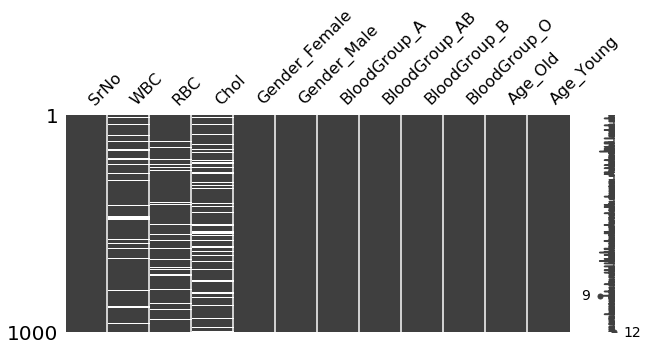

In [37]:
mn.matrix(nw,figsize =(10,4))

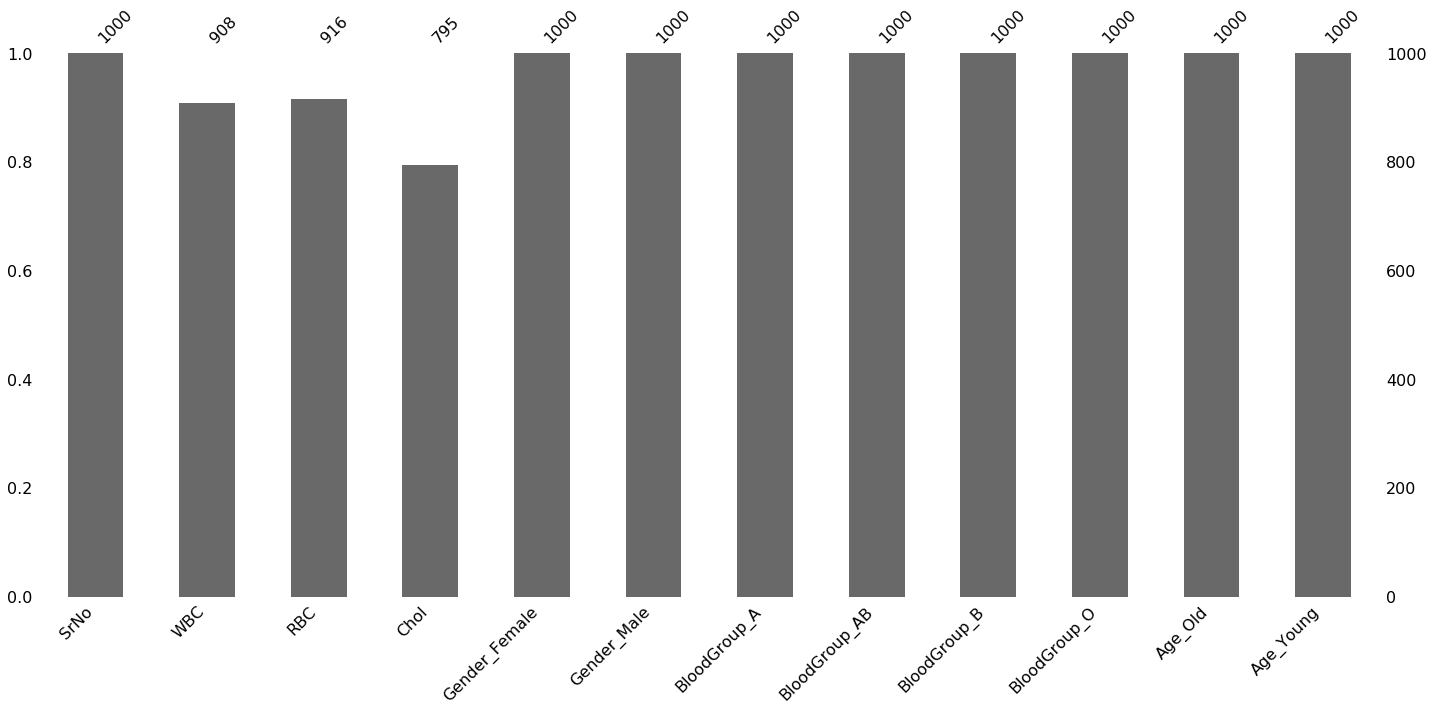

In [38]:
mn.bar(nw)

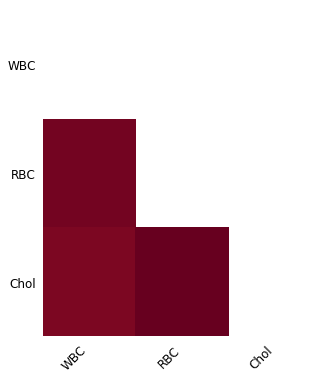

In [39]:
mn.heatmap(nw, figsize=(5,6), fontsize = 12)

In [40]:
YYY = fancyimpute.MICE(verbose=False)

In [41]:
Data1 = YYY.complete(nw)
print(Data1)

[[  1.00000000e+00   7.71000000e+03   7.40000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  2.00000000e+00   6.56000000e+03   4.70000000e+00 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  3.00000000e+00   5.69000000e+03   7.53000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]
 ..., 
 [  9.98000000e+02   7.44000000e+03   5.97000000e+00 ...,   1.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  9.99000000e+02   7.56000000e+03   5.79000000e+00 ...,   1.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  1.00000000e+03   7.20000000e+03   4.70000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


In [42]:
nd = pd.DataFrame(Data1, columns=nw.columns)
nd.head()

,SrNo,WBC,RBC,Chol,Gender_Female,Gender_Male,BloodGroup_A,BloodGroup_AB,BloodGroup_B,BloodGroup_O,Age_Old,Age_Young
0,1.0,7710.000000,7.40,258.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,6560.000000,4.70,209.678398,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,5690.000000,7.53,184.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4.0,6680.000000,6.85,199.797467,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5.0,7136.205258,7.72,187.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# End of Technique 2